In [ ]:
pip install control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 10.4 MB/s eta 0:00:00


In [ ]:
#importando as bibliotecas
import control as ctl
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#define as constantes
K=1.6
M=0.1
fv=0.2
wn=np.sqrt(K/M)
Tsim=10

In [ ]:
#cria a função transferência em malha aberta
P_s=ctl.tf([1],[M,fv,K])
print('FT malha aberta=',P_s)

FT malha aberta= 
          1
---------------------
0.1 s^2 + 0.2 s + 1.6



In [ ]:
#controlador PID
Kp=10*wn
Ki=2*wn
Kd=1*wn
C_s=ctl.tf([Kd,Kp,Ki],[1,0])
print('FT controlador=',C_s)

FT controlador= 
4 s^2 + 40 s + 8
----------------
       s



In [ ]:
#sensor unitário
H_s=ctl.tf([1],[1])
print('FT sensor unitário=',H_s)

FT sensor unitário= 
1
-
1



In [ ]:
#FT em malha fechada
#G1_s=(C_s*P_s)/(1+C_s*P_s*H_s)
G1_s=ctl.feedback(ctl.series(C_s,P_s),H_s,sign=-1)
print('FT malha fechada=',G1_s)

FT malha fechada= 
       4 s^2 + 40 s + 8
------------------------------
0.1 s^3 + 4.2 s^2 + 41.6 s + 8



In [ ]:
#calcula a resposta ao degrau
T_ma,yout_ma=ctl.step_response(P_s,Tsim)
T_mf,yout_mf=ctl.step_response(G1_s,Tsim)

In [ ]:
#calcula um degrau unitário
T_degrau=np.linspace(-1,Tsim,1000)
degrau=np.ones_like(T_degrau)
degrau[T_degrau<0]=0

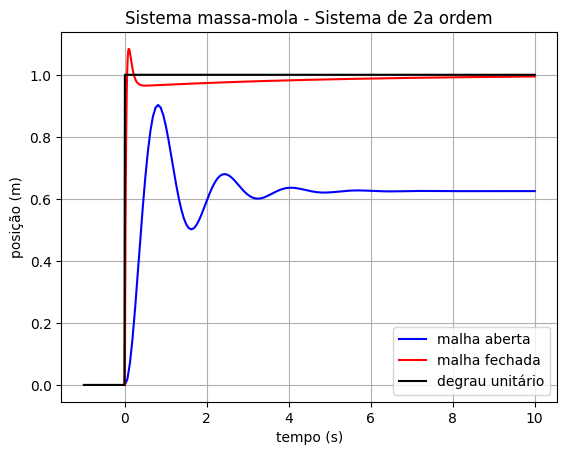

In [ ]:
#plota os resultados
plt.plot(T_ma,yout_ma,'b-')
plt.plot(T_mf,yout_mf,'r-')
plt.plot(T_degrau,degrau,'k-')
plt.xlabel('tempo (s)')
plt.ylabel('posição (m)')
plt.legend(['malha aberta','malha fechada','degrau unitário'])
plt.title('Sistema massa-mola - Sistema de 2a ordem')
plt.grid()